In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from matplotlib import style

In [ ]:
train_df = pd.read_csv(r"/content/train.csv")   # insert titanic training data set

In [ ]:
test_df = pd.read_csv(r"/content/test.csv")    # insert titanic testing  data set

In [ ]:
train_df.info() # check all info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_df.describe()  # check mean , medidan, and mode in data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.head(20) # check top 20 heading in table

In [ ]:
total = train_df.isnull().sum().sort_values(ascending = False)  # check null value in accending order

In [ ]:
# total  null value in percentage

precent = (train_df.isnull().sum()/train_df.isnull().count() * 100).sort_values(ascending = False)

In [ ]:
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
precent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [ ]:
missing_tb = pd.concat([total,precent], axis = 1,keys=['Total_miss','%'])  # create missing table

In [ ]:
missing_tb

,Total_miss,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


## Create A Plot Survived With Men  And Female Fom


<ipython-input-4-583c9296621a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label=surv,ax=axes[0],kde=False)
<ipython-input-4-583c9296621a>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bi

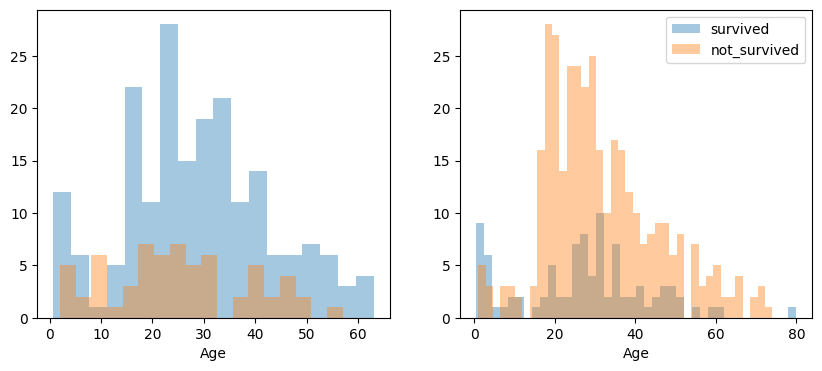

In [ ]:
## Create A Plot Survived With Men  And Female Form

surv = 'survived'
not_surv = 'not_survived'

fig, axes=plt.subplots(nrows= 1, ncols=2, figsize=(10,4))
men=train_df[train_df['Sex']=='male']
women=train_df[train_df['Sex']=='female']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18, label=surv,ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins=18, label=not_surv,ax=axes[0],kde=False)
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),bins=40, label=surv,ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40, label=not_surv,ax=axes[1],kde=False)
ax.legend()

In [ ]:
men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,14.678201,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


In [ ]:
women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,314.000000,314.000000,314.000000,261.000000,314.000000,314.000000,314.000000
mean,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
std,256.846324,0.438211,0.857290,14.110146,1.156520,1.022846,57.997698
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,231.750000,0.000000,1.000000,18.000000,0.000000,0.000000,12.071875
50%,414.500000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,641.250000,1.000000,3.000000,37.000000,1.000000,1.000000,55.000000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [ ]:
# embarked , pclass and gender
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


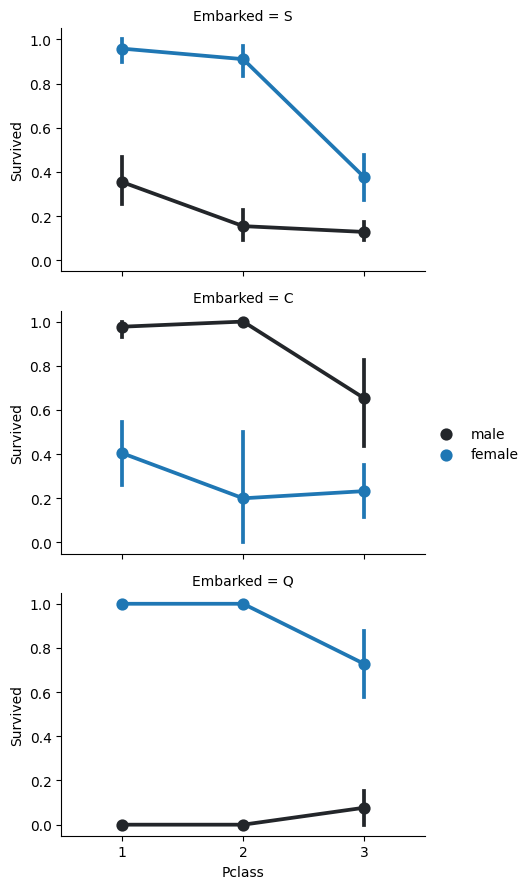

In [ ]:
# create a facetgrid plot and check that

g = sns.FacetGrid(train_df, row = 'Embarked', aspect=1.5)
g
g.map(sns.pointplot, 'Pclass','Survived', 'Sex')
g.add_legend()

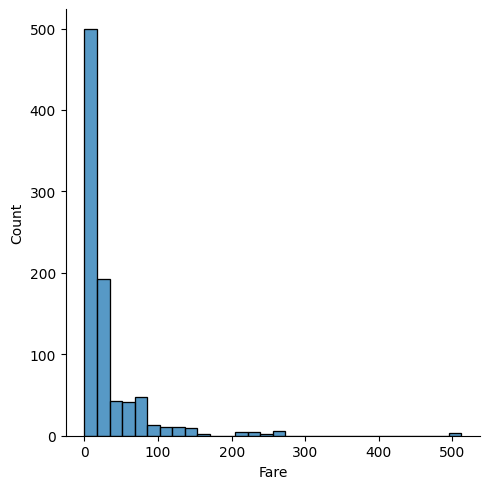

In [ ]:
sns.displot(data = train_df, x='Fare', kde=False, bins=30)

<Axes: xlabel='Pclass', ylabel='Survived'>

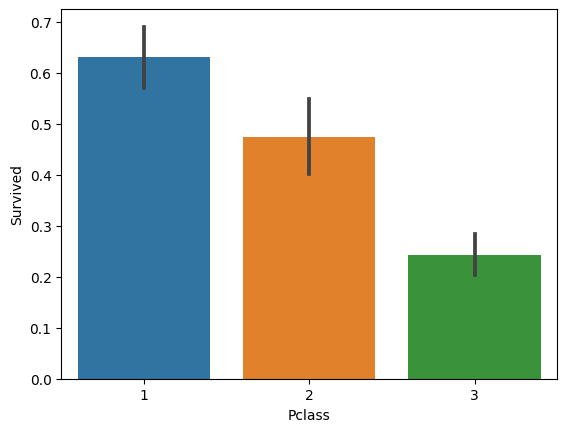

In [ ]:
sns.barplot(x='Pclass', y='Survived',data=train_df)

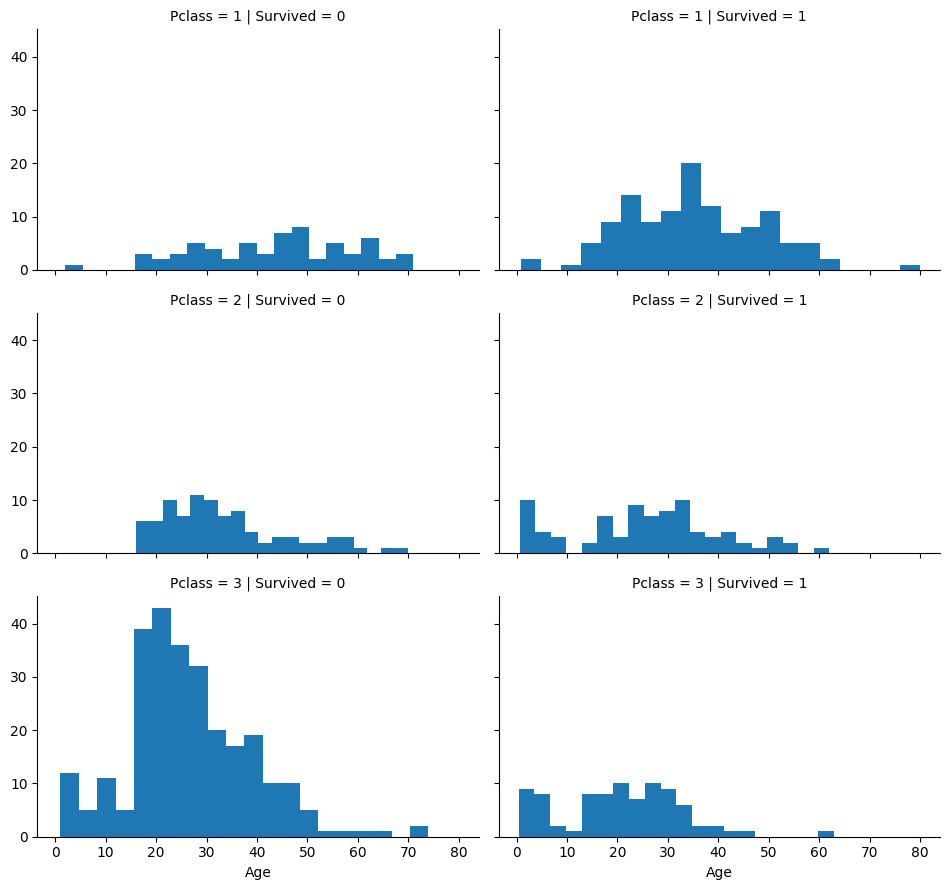

In [ ]:
g = sns.FacetGrid(train_df, row='Pclass',col='Survived', aspect=1.6)
g.map(plt.hist,'Age',bins=20)

In [ ]:
data = [train_df,test_df]

In [ ]:
data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [ ]:
for dataset in data:
  dataset['relatives']= dataset['SibSp']+dataset['Parch']

  dataset.loc[dataset['relatives']>0,'not_alone']=0

  dataset.loc[dataset['relatives']==0,'not_alone']=1

In [ ]:
dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1.0    537
0.0    354
Name: not_alone, dtype: int64

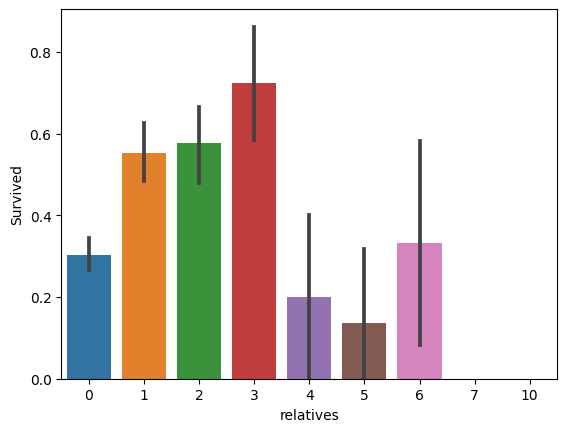

In [ ]:
ax = sns.barplot(x='relatives', y='Survived', data=train_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  relatives    891 non-null    int64  
 13  not_alone    891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [ ]:
# drop the column
train_df = train_df.drop(['PassengerId'],axis=1)
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1.0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0.0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1.0


In [ ]:
test_df = test_df.drop(['PassengerId'], axis=1)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0.0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1.0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1.0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1.0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1.0
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1.0


In [ ]:
test_df = test_df.drop(['Cabin'], axis=1)
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0.0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1.0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S,0,1.0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,1.0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1.0
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S,0,1.0


In [ ]:
# missing value replace

In [ ]:
# age

data = [train_df, test_df]

for dataset in data:
  mean = dataset['Age'].mean()
  std = dataset['Age'].std()
  null_count = dataset['Age'].isnull().sum()

  rand_age = np.random.randint(mean - std, mean+std, size = null_count)

  age_slic = dataset['Age'].copy()

  age_slic[np.isnan(age_slic)] = rand_age

  dataset['Age'] = age_slic

In [ ]:
mean = dataset['Age'].mean()
mean

30.111244019138756

In [ ]:
std = dataset['Age'].std()
std

13.140069309949924

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Name       418 non-null    object 
 2   Sex        418 non-null    object 
 3   Age        418 non-null    float64
 4   SibSp      418 non-null    int64  
 5   Parch      418 non-null    int64  
 6   Ticket     418 non-null    object 
 7   Fare       417 non-null    float64
 8   Embarked   418 non-null    object 
 9   relatives  418 non-null    int64  
 10  not_alone  418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [ ]:
train_df['Embarked'].describe()

count     891
unique      4
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common = 's'
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna(common)

In [ ]:
# fare ko mean se replace karna

test_df.describe()

,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,2.265550,30.482057,0.447368,0.392344,35.627188,0.839713,0.605263
std,0.841838,13.220220,0.896760,0.981429,55.907576,1.519072,0.489380
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,28.250000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000,1.000000


In [ ]:
test_df['Fare'] = test_df['Fare'].fillna(35.62)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Name       418 non-null    object 
 2   Sex        418 non-null    object 
 3   Age        418 non-null    float64
 4   SibSp      418 non-null    int64  
 5   Parch      418 non-null    int64  
 6   Ticket     418 non-null    object 
 7   Fare       418 non-null    float64
 8   Embarked   418 non-null    object 
 9   relatives  418 non-null    int64  
 10  not_alone  418 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 36.0+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Cabin      204 non-null    object 
 10  Embarked   889 non-null    object 
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [ ]:
# change data type in float to intiger

for dataset in data:
  dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)

In [ ]:
for dataset in data:
  dataset['not_alone'] = dataset['not_alone'].astype(int)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Pclass     418 non-null    int64 
 1   Name       418 non-null    object
 2   Sex        418 non-null    object
 3   Age        418 non-null    int64 
 4   SibSp      418 non-null    int64 
 5   Parch      418 non-null    int64 
 6   Ticket     418 non-null    object
 7   Fare       418 non-null    int64 
 8   Embarked   418 non-null    object
 9   relatives  418 non-null    int64 
 10  not_alone  418 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 36.0+ KB


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Name       891 non-null    object
 3   Sex        891 non-null    object
 4   Age        891 non-null    int64 
 5   SibSp      891 non-null    int64 
 6   Parch      891 non-null    int64 
 7   Ticket     891 non-null    object
 8   Fare       891 non-null    int64 
 9   Cabin      204 non-null    object
 10  Embarked   889 non-null    object
 11  relatives  891 non-null    int64 
 12  not_alone  891 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 90.6+ KB


In [ ]:
gander = {'male':0, 'female':1}

In [ ]:
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(gander)

In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,0,2,1,0,7,0,0.0,1,0,0
1,1,1,1,5,1,0,71,3,1.0,1,0,3
2,1,3,1,3,0,0,7,0,0.0,0,1,0
3,1,1,1,5,1,0,53,3,0.0,1,0,3
4,0,3,0,5,0,0,8,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13,0,0.0,0,1,0
887,1,1,1,2,0,0,30,2,0.0,0,1,2
888,0,3,1,3,1,2,23,0,0.0,3,0,0
889,1,1,0,3,0,0,30,3,1.0,0,1,3


In [ ]:
# also map with embarked

amb = {'S':0,'C':1,'Q':2}

for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].map(amb)

In [ ]:
# drop name and

train_df=train_df.drop(['Name','Ticket'], axis=1)


In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,0,22,1,0,7,0,0.0,1,0,0
1,1,1,1,38,1,0,71,3,1.0,1,0,3
2,1,3,1,26,0,0,7,0,0.0,0,1,0
3,1,1,1,35,1,0,53,3,0.0,1,0,3
4,0,3,0,35,0,0,8,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0.0,0,1,0
887,1,1,1,19,0,0,30,2,0.0,0,1,2
888,0,3,1,27,1,2,23,0,0.0,3,0,0
889,1,1,0,26,0,0,30,3,1.0,0,1,3


In [ ]:
# Age Ko Grouping karna

In [ ]:
import re
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':7, 'I':8}
data = [train_df,test_df]

for dataset in data:
  dataset['Cabin'] = dataset['Cabin'].fillna('U0')
  dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
  dataset['Deck'] = dataset['Deck'].map(deck)
  dataset['Deck'] = dataset['Deck'].fillna(0)
  dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin featuers

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [ ]:
data = [train_df , test_df]
for dataset in data:
  dataset['Age'] = dataset['Age'].astype(int)
  dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
  dataset.loc[ (dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
  dataset.loc[ (dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
  dataset.loc[ (dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
  dataset.loc[ (dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
  dataset.loc[ (dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
  dataset.loc[ (dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
  dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# lets  see how its distributed
test_df['Age'].value_counts()


6    91
3    79
4    66
5    62
2    52
1    45
0    23
Name: Age, dtype: int64

In [ ]:
data = [train_df, test_df]
for dataset in data:
  dataset['Age_class'] = dataset['Age']* dataset['Pclass']

In [ ]:
test_df.drop(['Name', 'Ticket'],axis= 1, inplace=True)

In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_class
0,0,3,0,2,1,0,7,0.0,1,0,0,6
1,1,1,1,5,1,0,71,1.0,1,0,3,5
2,1,3,1,3,0,0,7,0.0,0,1,0,9
3,1,1,1,5,1,0,53,0.0,1,0,3,5
4,0,3,0,5,0,0,8,0.0,0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13,0.0,0,1,0,6
887,1,1,1,2,0,0,30,0.0,0,1,2,2
888,0,3,1,3,1,2,23,0.0,3,0,0,9
889,1,1,0,3,0,0,30,1.0,0,1,3,3


# Lets built a model for a regression

In [ ]:
train_df = train_df.drop(['Cabin'], axis=1)

In [ ]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_class
0,3,0,5,0,0,7,2,0,1,15
1,3,1,6,1,0,7,0,1,0,18
2,2,0,6,0,0,9,2,0,1,12
3,3,0,3,0,0,8,0,0,1,9
4,3,1,2,1,1,12,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...
413,3,0,5,0,0,8,0,0,1,15
414,1,1,5,0,0,108,1,0,1,5
415,3,0,5,0,0,7,0,0,1,15
416,3,0,3,0,0,8,0,0,1,9


In [ ]:
x_train = train_df.drop('Survived', axis=1)   # Drop Survived columns
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Age_class
0,3,0,2,1,0,7,0.0,1,0,0,6
1,1,1,5,1,0,71,1.0,1,0,3,5
2,3,1,3,0,0,7,0.0,0,1,0,9
3,1,1,5,1,0,53,0.0,1,0,3,5
4,3,0,5,0,0,8,0.0,0,1,0,15
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,3,0,0,13,0.0,0,1,0,6
887,1,1,2,0,0,30,0.0,0,1,2,2
888,3,1,3,1,2,23,0.0,3,0,0,9
889,1,0,3,0,0,30,1.0,0,1,3,3


In [ ]:
y_train = train_df['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
x_test = test_df.copy()

In [ ]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_class
0,3,0,5,0,0,7,2,0,1,15
1,3,1,6,1,0,7,0,1,0,18
2,2,0,6,0,0,9,2,0,1,12
3,3,0,3,0,0,8,0,0,1,9
4,3,1,2,1,1,12,0,2,0,6
...,...,...,...,...,...,...,...,...,...,...
413,3,0,5,0,0,8,0,0,1,15
414,1,1,5,0,0,108,1,0,1,5
415,3,0,5,0,0,7,0,0,1,15
416,3,0,3,0,0,8,0,0,1,9


In [ ]:
log = LogisticRegression()
log

LogisticRegression()

In [ ]:
log.fit(x_train,y_train)

In [ ]:
y_pred = log.predict(x_test) # predict the model
y_pred

In [ ]:
acc_log = round(log.score(x_train,y_train)*100,2)   # check the accuracy

In [ ]:
acc_log